# I. Installation & Initial Set up

Check to see what packages are already included

In [1]:
sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
21,application_1588088735392_0022,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1
boto                       2.49.0
jmespath                   0.9.4
lxml                       4.4.2
mysqlclient                1.4.6
nltk                       3.4.5
nose                       1.3.4
numpy                      1.14.5
pip                        20.1
py-dateutil                2.2
python36-sagemaker-pyspark 1.2.6
pytz                       2019.3
PyYAML                     3.11
setuptools                 46.1.3
six                        1.13.0
soupsieve                  1.9.5
wheel                      0.34.2
windmill                   1.6

Installing the necessary libraries to conduct the analysis

In [2]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

  Using cached seaborn-0.10.1-py3-none-any.whl (215 kB)
  Using cached scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl (26.1 MB)

In [3]:
#Check again to see if the packages are installed
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1
boto                       2.49.0
cycler                     0.10.0
jmespath                   0.9.4
kiwisolver                 1.2.0
lxml                       4.4.2
matplotlib                 3.2.1
mysqlclient                1.4.6
nltk                       3.4.5
nose                       1.3.4
numpy                      1.14.5
pandas                     1.0.3
pip                        20.1
py-dateutil                2.2
pyparsing                  2.4.7
python-dateutil            2.8.1
python36-sagemaker-pyspark 1.2.6
pytz                       2019.3
PyYAML                     3.11
scipy                      1.4.1
seaborn                    0.10.1
setuptools                 46.1.3
six                        1.13.0
soupsieve                  1.9.5
wheel                      0.34.2
windmill                   1.6

### Importing

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Loading Data
We are finally ready to load data. Using `spark` load the data from S3 into a `dataframe` object that we can manipulate further down in our analysis.

In [5]:
df = spark.read.json('s3://sta9760-yelp-dataset/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Overview of the Data

In [6]:
#Display Total Columns, Total Rows and dataframe schema below
print(f'Total Columns: {len(df.dtypes)}')
print(f'Total Rows: {df.count():,}')
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 14
Total Rows: 209,393
root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable

In [7]:
bd = df.select('business_id', 'name', 'city', 'state', 'categories')
bd.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+--------------------+
|         business_id|                name|           city|state|          categories|
+--------------------+--------------------+---------------+-----+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|   NC|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|   AZ|Health & Medical,...|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|   QC|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|   NV|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|   AZ|Home Services, Pl...|
+--------------------+--------------------+---------------+-----+--------------------+
only showing top 5 rows

# II. Analyzing Categories

In this part, I'm trying to answer two questions:

**1. How many unique categories are represented in this dataset?**

**2. What are the top 20 most popular categories available?**

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions like above.

We need to "break out" these categories from the business ids. One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

For instance, given the following:


| business_id | categories |
|-------------|------------|
| abcd123     | a,b,c      |

We would like to derive something like:

| business_id | category |
|-------------|------------|
| abcd123     | a          |
| abcd123     | b          |
| abcd123     | c          |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.


In [8]:
from pyspark.sql.functions import split, explode, desc
categories = bd.select(bd.business_id, 
                             explode(split(bd.categories, ', ')).alias('category'))
categories.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------+
|         business_id|        category|
+--------------------+----------------+
|f9NumwFMBDn751xgF...|     Active Life|
|f9NumwFMBDn751xgF...|Gun/Rifle Ranges|
|f9NumwFMBDn751xgF...|     Guns & Ammo|
|f9NumwFMBDn751xgF...|        Shopping|
|Yzvjg0SayhoZgCljU...|Health & Medical|
+--------------------+----------------+
only showing top 5 rows

## Total Unique Categories

Finally, we are ready to answer the question: **What is the total number of unique categories available?**

In [9]:
total = categories.select('category').distinct().count()
print('There are total ' + str(total) + ' unique categories available in this dataset')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

There are total 1336 unique categories available in this dataset

## Top Categories By Business

Now let's find the top categories in this dataset by rolling up categories.

In [10]:
num_category = categories.groupBy('category').count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
#Find top 20 categories by number of business
top_category = num_category.orderBy(desc('count')).limit(20)
top_category.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|            category|count|
+--------------------+-----+
|         Restaurants|63944|
|            Shopping|34644|
|                Food|32991|
|       Home Services|22487|
|       Beauty & Spas|20520|
|    Health & Medical|19227|
|      Local Services|15783|
|          Automotive|14720|
|           Nightlife|14211|
|                Bars|12400|
|Event Planning & ...|11263|
|         Active Life|10225|
|        Coffee & Tea| 8415|
|             Fashion| 8374|
|           Fast Food| 8106|
|          Sandwiches| 8064|
|American (Traditi...| 7596|
|       Home & Garden| 7331|
|         Hair Salons| 7303|
|               Pizza| 7302|
+--------------------+-----+

### Bar Chart of Top Categories

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

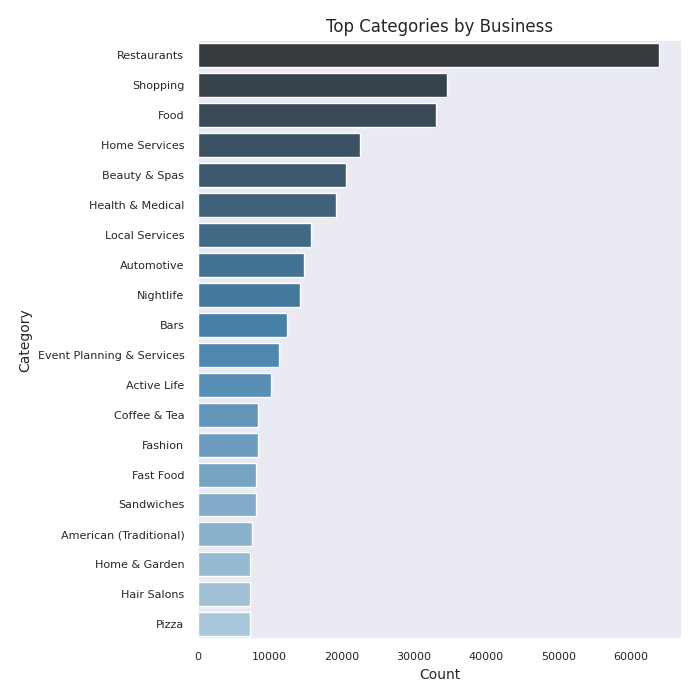

In [45]:
#Change SparkDF to Pandas in order to plot the data
tc = top_category.toPandas()

#Plot top 20 Categories
sns.set()
plt.figure(figsize = (7,7))

ax = sns.barplot(x = 'count', y = 'category', data = tc, palette="Blues_d")

plt.title('Top Categories by Business', fontsize = 12)

plt.xlabel('Count', fontsize = 10)
plt.ylabel('Category', fontsize = 10)

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

ax.grid(False)

plt.tight_layout()
%matplot plt

# III. Do Yelp Reviews Skew Negative?

Oftentimes, it is said that the only people who write a written review are those who are extremely _dissatisfied_ or extremely _satisfied_ with the service received. 

How true is this really? Let's try and answer this question.

## Loading Review Data

Begin by loading the review data set from S3 and printing schema to determine what data is available.

In [13]:
review = spark.read.json('s3://sta9760-yelp-dataset/yelp_academic_dataset_review.json')
review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

Let's begin by listing the `business_id` and `stars` columns together for the user reviews data.

In [14]:
all_star = review.select('business_id', 'stars')
all_star.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|-MhfebM0QIsKt87iD...|  2.0|
|lbrU8StCq3yDfr-QM...|  1.0|
|HQl28KMwrEKHqhFrr...|  5.0|
|5JxlZaqCnk1MnbgRi...|  1.0|
|IS4cv902ykd8wj1TR...|  4.0|
+--------------------+-----+
only showing top 5 rows

Now, let's aggregate along the `stars` column to get a resultant dataframe that displays _average stars_ per business as accumulated by users who **took the time to submit a written review**.

In [15]:
review.createOrReplaceTempView('Review1')
star_review = spark.sql(
'''
SELECT `business_id`, AVG (`stars`) AS average_stars FROM Review1
WHERE text IS NOT NULL
GROUP BY `business_id`
'''
)
star_review.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|     average_stars|
+--------------------+------------------+
|ATeOjZzE3VOI-RW7F...| 3.433734939759036|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|vbUABNAQI2iwN7v0x...|2.4545454545454546|
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|r-W1HPIZ3V6S2DaXh...| 4.852459016393443|
+--------------------+------------------+
only showing top 5 rows

Now the fun part - let's join our two dataframes (reviews and business data) by `business_id`. 

In [16]:
business = df.select('business_id', 'name', 'city', 'state', 'stars')
bs = business.join(star_review, on=['business_id'], how='inner').drop('business_id')
bs.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------+-----+-----+------------------+
|                name|       city|state|stars|     average_stars|
+--------------------+-----------+-----+-----+------------------+
|Delmonico Steakhouse|  Las Vegas|   NV|  4.0|  4.11784140969163|
|Neo-Paws Internat...|    Toronto|   ON|  2.5|2.3333333333333335|
| McFarling Law Group|  Las Vegas|   NV|  4.5|             4.375|
|Volvo of Mississauga|Mississauga|   ON|  3.5|3.3333333333333335|
|Andre Agassi Coll...|  Las Vegas|   NV|  5.0|               5.0|
+--------------------+-----------+-----+-----+------------------+
only showing top 5 rows

Compute a new dataframe that calculates what we will call the _skew_ (for lack of a better word) between the avg stars accumulated from written reviews and the _actual_ star rating of a business (ie: the average of stars given by reviewers who wrote an actual review **and** reviewers who just provided a star rating).

The formula you can use is something like:

```
(row['avg(stars)'] - row['stars']) / row['stars']
```

If the **skew** is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If **skew** is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [17]:
bs = bs.withColumn('skew', (bs.average_stars - bs.stars)/bs.stars)
bs.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------+-----+-----+------------------+--------------------+
|                name|       city|state|stars|     average_stars|                skew|
+--------------------+-----------+-----+-----+------------------+--------------------+
|Delmonico Steakhouse|  Las Vegas|   NV|  4.0|  4.11784140969163|0.029460352422907565|
|Neo-Paws Internat...|    Toronto|   ON|  2.5|2.3333333333333335|-0.06666666666666661|
| McFarling Law Group|  Las Vegas|   NV|  4.5|             4.375|-0.02777777777777...|
|Volvo of Mississauga|Mississauga|   ON|  3.5|3.3333333333333335|-0.04761904761904...|
|Andre Agassi Coll...|  Las Vegas|   NV|  5.0|               5.0|                 0.0|
+--------------------+-----------+-----+-----+------------------+--------------------+
only showing top 5 rows

Now, let's graph the data!

In [18]:
#Change dataframe to Pandas in order to plot the data
skew = bs.select('skew').toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

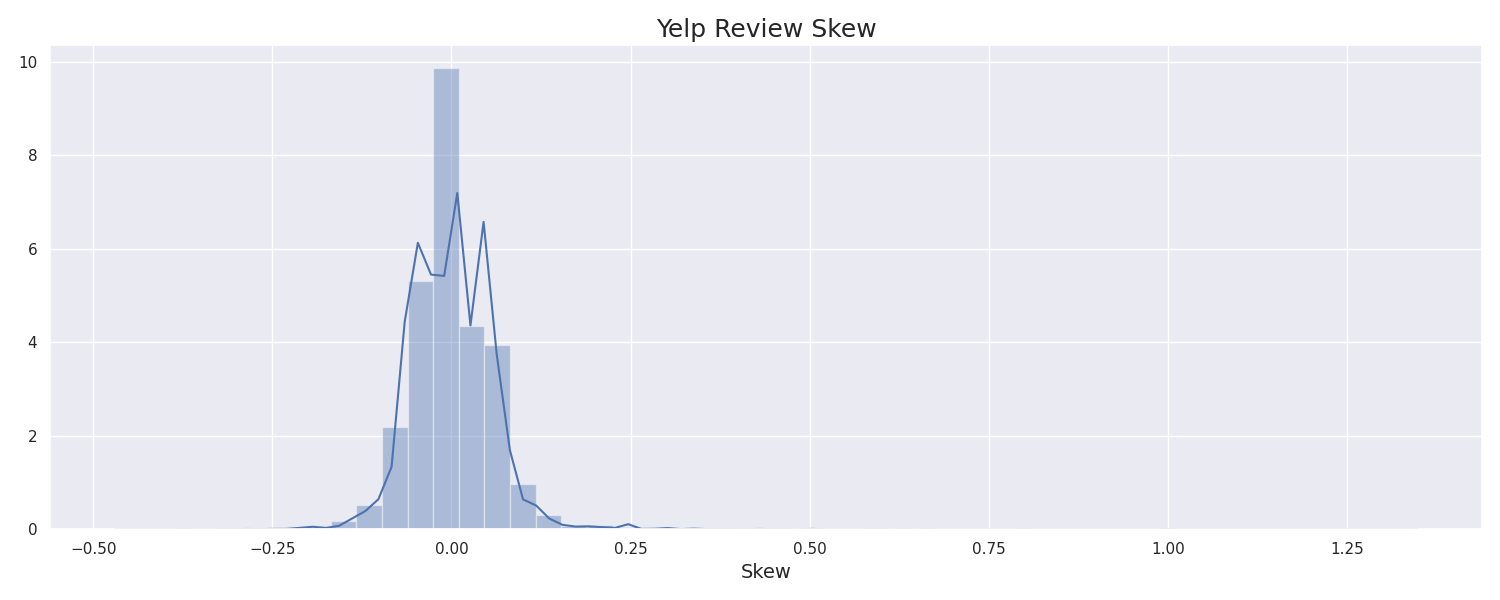

In [19]:
#Plotting data
sns.set()
plt.figure(figsize=(15,6))
ax = sns.distplot(skew)

ax.set_xlabel('Skew', size=14)

plt.title("Yelp Review Skew", size=18)

plt.tight_layout()

%matplot plt

Although the skew's distribution seems to be normal, it skews to the right. Based on the graph, the *satisfaction* level of reviewers who left positively skewed reviews is greater than the *dissatisfaction* level of reviewers who left negatively skewed reviews.

In [20]:
skew.describe()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                skew
count  209393.000000
mean        0.001235
std         0.055235
min        -0.454545
25%        -0.033898
50%         0.000000
75%         0.035714
max         1.333333

Looking at the graph, it appears that the average skew is negative. However, based on the cell above, the average skew is actually slightly positive, and the median skew is 0.

To answer the question if Yelp reviews skew negative, we can formulate a hypothesis test the population mean skew.

### One-Tailed Single Sample t-test

$$
H_o: \mu_{skew} \geq 0 \\ \\
H_a: \mu_{skew} < 0 
$$

- Test Statistic:

$$
t = \frac{\bar x - \mu_{skew}}{\frac{s}{\sqrt n}} = \frac{0.001235 - 0}{\frac{0.055235}{\sqrt{209393}}} = 10.234
$$

In [21]:
#t-test using stats.ttest_1samp
from scipy import stats

t, p = stats.ttest_1samp(skew, 0)

p /= 2

print('Test Statistic: {}\np-value: {}'.format(*t, *p))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Test Statistic: 10.234180992254487
p-value: 7.062066589952781e-25

### Conclusion
We cannot reject the null hypothesis $H_o: \mu_{skew} \geq 0$. Although the `p-value` is less than 0.05, the `test statistic` is positive. Therefore, our analysis cannot prove whether skew review is negative or positive.

# IV. Should the Elite be Trusted? 

In this final section, the question of **"Should the Elite be Trusted?"** will be explored. The goal is to analyze and visualize the accuracy of star ratings for both elite and non-elite users and see how they change over time.

First, we will need to join 3 dataframes: User, Review, and Business.

### Loading User Data

In [22]:
user = spark.read.json('s3://sta9760-yelp-dataset/yelp_academic_dataset_user.json')
user.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

We have the data of each `user_id` with list of the year they're elite user

In [23]:
user.select('user_id', 'elite').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|             user_id|               elite|
+--------------------+--------------------+
|ntlvfPzc8eglqvk92...|                    |
|FOBRPlBHa3WPHFB5q...|2008,2009,2010,20...|
|zZUnPeh2hEp0WydbA...|                2010|
|QaELAmRcDc5TfJEyl...|                2009|
|xvu8G900tezTzbbfq...|2009,2010,2011,20...|
+--------------------+--------------------+
only showing top 5 rows

### Break out the Elite Columns

To make it easier for our analysis, we need to "break out" the `elite` column

In [24]:
temp_user = user.select('user_id', explode(split(user.elite, ',')).alias('elite'))

from pyspark.sql.types import IntegerType
temp_user = temp_user.withColumn('elite', temp_user.elite.cast(IntegerType()))
temp_user.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|             user_id|elite|
+--------------------+-----+
|ntlvfPzc8eglqvk92...| null|
|FOBRPlBHa3WPHFB5q...| 2008|
|FOBRPlBHa3WPHFB5q...| 2009|
|FOBRPlBHa3WPHFB5q...| 2010|
|FOBRPlBHa3WPHFB5q...| 2011|
+--------------------+-----+
only showing top 5 rows

Over the years, the `elite` status of users might have changed. For this analysis, we define that an elite review is an review from a user that have the elite status in the same year. 

For example, I started using Yelp in 2009 and became elite in 2011.

- All reviews I made in 2009 to 2010 would be counted as non-elite reviews

- All reviews I made in 2011 would be counted as elite reviews

### Join Review and Business Data

In [25]:
from pyspark.sql.functions import to_date, year

bus_temp = df.select('business_id','stars').withColumnRenamed('stars', 'bus_stars')
rev_temp = review.select('review_id', 'business_id', 'user_id', 'stars',
                         year(to_date(review.date, 'yyyy-MM-dd HH:mm:ss')).alias('year')).withColumnRenamed('stars', 'user_stars')
bus_rev = rev_temp.join(bus_temp, on = ['business_id'], how = 'left')
bus_rev = bus_rev.select('business_id', 'user_id', 'review_id', 'bus_stars', 'user_stars','year')

bus_rev.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+--------------------+---------+----------+----+
|         business_id|             user_id|           review_id|bus_stars|user_stars|year|
+--------------------+--------------------+--------------------+---------+----------+----+
|-MhfebM0QIsKt87iD...|OwjRMXRC0KyPrIlcj...|xQY8N_XvtGbearJ5X...|      3.5|       2.0|2015|
|lbrU8StCq3yDfr-QM...|nIJD_7ZXHq-FX8byP...|UmFMZ8PyXZTY2Qcwz...|      1.5|       1.0|2013|
|HQl28KMwrEKHqhFrr...|V34qejxNsCbcgD8C0...|LG2ZaYiOgpr2DK_90...|      4.0|       5.0|2015|
|5JxlZaqCnk1MnbgRi...|ofKDkJKXSKZXu5xJN...|i6g_oA9Yf9Y31qt0w...|      3.5|       1.0|2011|
|IS4cv902ykd8wj1TR...|UgMW8bLE0QMJDCkQ1...|6TdNDKywdbjoTkize...|      3.5|       4.0|2017|
+--------------------+--------------------+--------------------+---------+----------+----+
only showing top 5 rows

### Join User with Review & Business Data

In [26]:
user_bus_rev = bus_rev.join(temp_user, on = ['user_id'], how = 'outer')
user_bus_rev.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+--------------------+---------+----------+----+-----+
|             user_id|         business_id|           review_id|bus_stars|user_stars|year|elite|
+--------------------+--------------------+--------------------+---------+----------+----+-----+
|-0Ji0nOyFe-4yo8BK...|pmrHuQiy25xKB86tb...|a0r23pA6D4HDLb9P5...|      4.0|       4.0|2014| null|
|-0XPr1ilUAfp-yIXZ...|QhwaGi1niDeVEHMRt...|DfAjJ3KCimOdqplv4...|      2.5|       2.0|2012| null|
|-1KKYzibGPyUX-Mwk...|L772e6l2Yd0DJEyCB...|TbU3S2kWmfajlVov3...|      3.0|       4.0|2014| 2011|
|-1KKYzibGPyUX-Mwk...|L772e6l2Yd0DJEyCB...|TbU3S2kWmfajlVov3...|      3.0|       4.0|2014| 2012|
|-1KKYzibGPyUX-Mwk...|L772e6l2Yd0DJEyCB...|TbU3S2kWmfajlVov3...|      3.0|       4.0|2014| 2013|
+--------------------+--------------------+--------------------+---------+----------+----+-----+
only showing top 5 rows

### Non Elite Data

In [27]:
#Filter out Non Elite data only
non_elite = user_bus_rev.filter(user_bus_rev.elite.isNull())
non_elite.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+--------------------+---------+----------+----+-----+
|             user_id|         business_id|           review_id|bus_stars|user_stars|year|elite|
+--------------------+--------------------+--------------------+---------+----------+----+-----+
|-0Ji0nOyFe-4yo8BK...|pmrHuQiy25xKB86tb...|a0r23pA6D4HDLb9P5...|      4.0|       4.0|2014| null|
|-0XPr1ilUAfp-yIXZ...|QhwaGi1niDeVEHMRt...|DfAjJ3KCimOdqplv4...|      2.5|       2.0|2012| null|
|-1zQA2f_syMAdA04P...|DyYS-JKXlW2PCr_Gt...|y0BLDiU8nQi22t9OF...|      3.5|       5.0|2017| null|
|-1zQA2f_syMAdA04P...|aNe8ofTYrealxqv7V...|08j8zUlyJylKcJa_r...|      3.5|       5.0|2016| null|
|-1zQA2f_syMAdA04P...|5c-b0ALS_DyLvRCGr...|_aY8ReBavQVGHhCh7...|      2.5|       1.0|2017| null|
+--------------------+--------------------+--------------------+---------+----------+----+-----+
only showing top 5 rows

### Elite Data

In [28]:
#Filter out Elite data only
elite = user_bus_rev.filter(user_bus_rev.year == user_bus_rev.elite)
elite.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+--------------------+---------+----------+----+-----+
|             user_id|         business_id|           review_id|bus_stars|user_stars|year|elite|
+--------------------+--------------------+--------------------+---------+----------+----+-----+
|FZQXGfmkMASFWq3Jn...|DxgSVufr_6y_Rc63C...|6oALQf6cOf7bxSkB6...|      4.5|       4.0|2006| 2006|
|FZQXGfmkMASFWq3Jn...|tRUBzjp-25SdY-qFW...|tvhdNSGqn5IAatYiI...|      3.0|       4.0|2006| 2006|
|FZQXGfmkMASFWq3Jn...|KVsv8wRGnLX8QWoNZ...|oS5Baq2qIOh-3fNRx...|      4.0|       3.0|2006| 2006|
|FZQXGfmkMASFWq3Jn...|ujHiaprwCQ5ewziu0...|XJ4N_sV7p59_Y79iQ...|      3.5|       5.0|2006| 2006|
|jwMDC4ZCoiDXl9qZt...|lyiIwDxQ8NdjxMk9h...|emdtohZMghVEvSbqv...|      3.5|       3.0|2006| 2006|
+--------------------+--------------------+--------------------+---------+----------+----+-----+
only showing top 5 rows

### Calculate the difference of average star rating over the years

**1. Non Elite Star Rating Average Difference**

In [29]:
ne_star = non_elite.withColumn('non_elite_star_diff', non_elite.user_stars - non_elite.bus_stars)
ne_star = ne_star.groupBy('year').agg({'non_elite_star_diff':'avg'}).sort('year')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [30]:
ne_star.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+------------------------+
|year|avg(non_elite_star_diff)|
+----+------------------------+
|2004|                    0.75|
|2005|      0.5068493150684932|
|2006|      0.2710880195599022|
|2007|      0.2153315081537912|
|2008|      0.1168708597478453|
|2009|     0.06386955877998224|
|2010|     0.05933814048994795|
|2011|    0.024171091827483487|
|2012|    -0.02147622582011381|
|2013|     -0.0282225618404219|
|2014|    -0.00922987091908...|
|2015|    -0.01239640934334...|
|2016|    -0.02052381933019378|
|2017|    -0.03884251956445166|
|2018|    -0.06250701306861961|
|2019|    -0.10160517923312276|
+----+------------------------+

**2. Elite Star Rating Average Difference**

In [31]:
elite_star = elite.withColumn('elite_stars_diff', elite.user_stars - elite.bus_stars)
elite_star = elite_star.groupBy('year').agg({'elite_stars_diff':'avg'}).sort('year')
elite_star.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+---------------------+
|year|avg(elite_stars_diff)|
+----+---------------------+
|2006|   0.2660586835844568|
|2007|  0.24943687018375815|
|2008|  0.13426656151419558|
|2009|  0.12784468991216397|
|2010|  0.11065668202764976|
|2011|   0.1082114856102697|
|2012|  0.11504091993151973|
|2013|  0.09694511403671426|
|2014|  0.08177112679418984|
|2015|   0.0918269411014884|
|2016|  0.10704832237478244|
|2017|  0.12723198828731686|
|2018|  0.16126663100605382|
+----+---------------------+

### Joining the Non Elite and Elite data

In [32]:
star_diff = elite_star.join(ne_star, on = ['year'], how = 'inner')
star_diff = star_diff.sort('year')
star_diff.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+---------------------+------------------------+
|year|avg(elite_stars_diff)|avg(non_elite_star_diff)|
+----+---------------------+------------------------+
|2006|   0.2660586835844568|      0.2710880195599022|
|2007|  0.24943687018375815|      0.2153315081537912|
|2008|  0.13426656151419558|      0.1168708597478453|
|2009|  0.12784468991216397|     0.06386955877998224|
|2010|  0.11065668202764976|     0.05933814048994795|
|2011|   0.1082114856102697|    0.024171091827483487|
|2012|  0.11504091993151973|    -0.02147622582011381|
|2013|  0.09694511403671426|     -0.0282225618404219|
|2014|  0.08177112679418984|    -0.00922987091908...|
|2015|   0.0918269411014884|    -0.01239640934334...|
|2016|  0.10704832237478244|    -0.02052381933019378|
|2017|  0.12723198828731686|    -0.03884251956445166|
|2018|  0.16126663100605382|    -0.06250701306861961|
+----+---------------------+------------------------+

### Plotting the Difference between Star Rating of Elite & Non Elite Yelp over time

In [33]:
#Change SparkDF to Pandas in order to plot the data
star_diff = star_diff.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

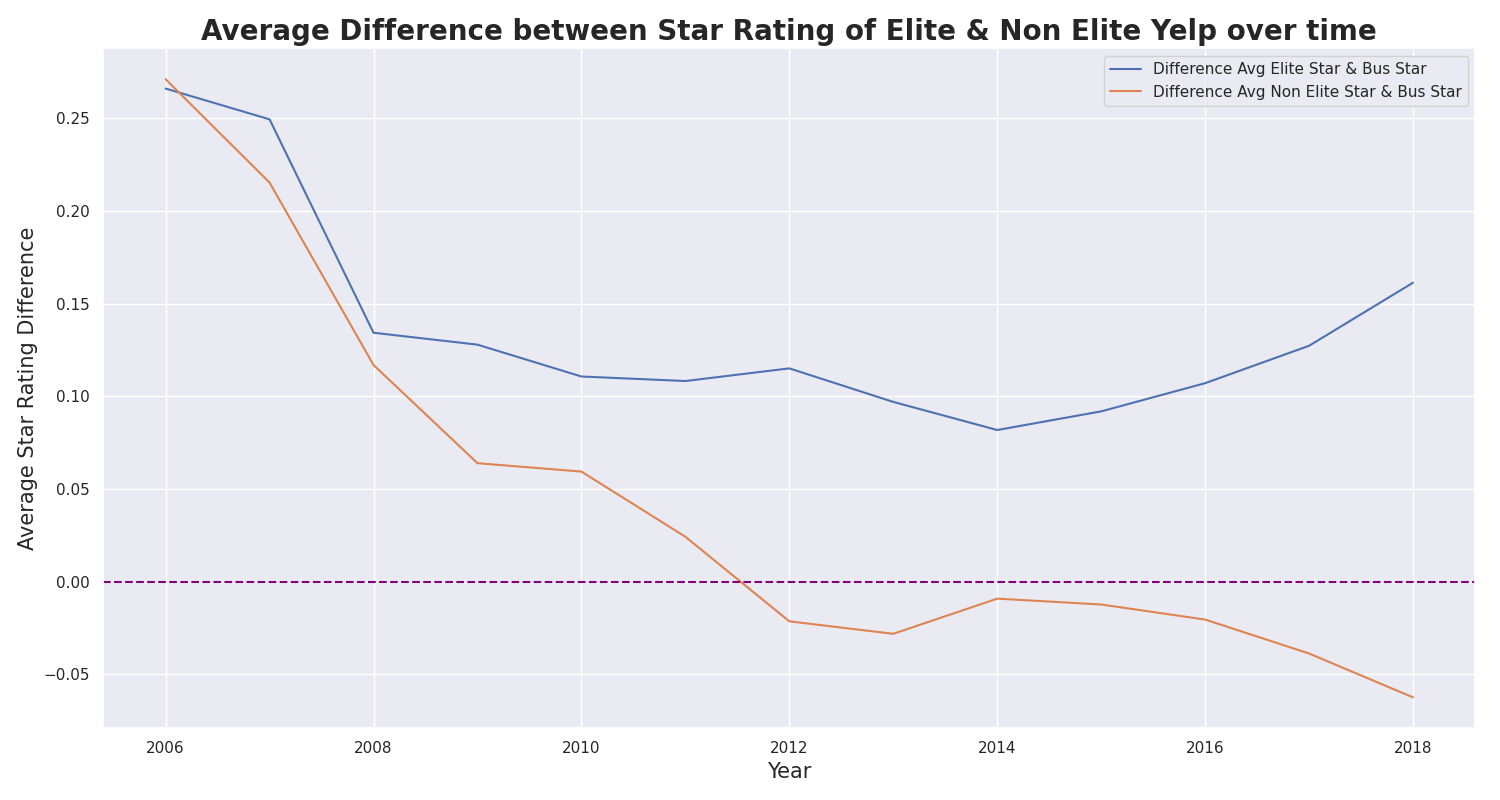

In [46]:
plt.figure(figsize = (15, 8))

plt.plot('year', 'avg(elite_stars_diff)', data = star_diff, label = 'Difference Avg Elite Star & Bus Star')
plt.plot('year', 'avg(non_elite_star_diff)', data = star_diff, label = 'Difference Avg Non Elite Star & Bus Star')
plt.axhline(ls='--', color='purple')

plt.legend(loc = 'upper right')

plt.title('Average Difference between Star Rating of Elite & Non Elite Yelp over time', fontsize = 20, weight = 'bold')

plt.xlabel('Year', fontsize = 15)
plt.ylabel('Average Star Rating Difference', fontsize = 15)

plt.tight_layout()

%matplot plt

Based on the time series plot above, there's a difference of rating between elite and non elite users. 

From 2006 to 2008, both non elite and elite users have similar average star difference.

Since 2009, we start seeing a significant difference in rating from both group. While non elite users have a downward trend (the difference between rating of non elite users and the real rating of business are more similar to each other over the years), the elite group average star rating difference increases over the year.

Moreover, the elite users line is always above 0 and the elite group always has higher value than non elite user over the years, except for 2006.

### Conclusion
We should **NOT** trust the elite reviews because they tend to overrate businesses. Elite group seems to give higher ratings to business than the real business rating should be